# EDA for Gemstone Dataset

## Introduction About the Data :


### The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

->id : unique identifier of each diamond

->carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

->cut : Quality of Diamond Cut

->color : Color of Diamond

->clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

->depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

->table : A diamond's table is the facet which can be seen when the stone is viewed face up.

->x : Diamond X dimension

->y : Diamond Y dimension

->x : Diamond Z dimension

## Target variable:

price: Price of the given Diamond.

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv



# Read Dataset

In [1]:
import pandas as pd
df = pd.read_csv("./data/gemstone.csv")
df.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# Dataset Info
 

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


## Drop id column as it is statistically insignificant


In [3]:
df = df.drop(labels=['id'],axis=1)


## Check Missing Values in Dataset

In [4]:
df.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### No Missing Values found in the dataset


# Check Duplicates in Dataset

In [5]:
df.duplicated().sum()


0

#### No Duplicated data found

#                                                       Descriptive Statistics

### Numerical and Categorical columns seperation


In [6]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


### Numerical Columns Description


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


# Categorical Columns Description


In [8]:
df[categorical_columns].describe().T


,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


### All unique values in dataset


In [9]:
df.nunique()


carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

## Note that cut , color and clarity are ordinal features in dataset.


# Univariate Analysis with Visualisation

### Univariate Analysis of Numerical Variables

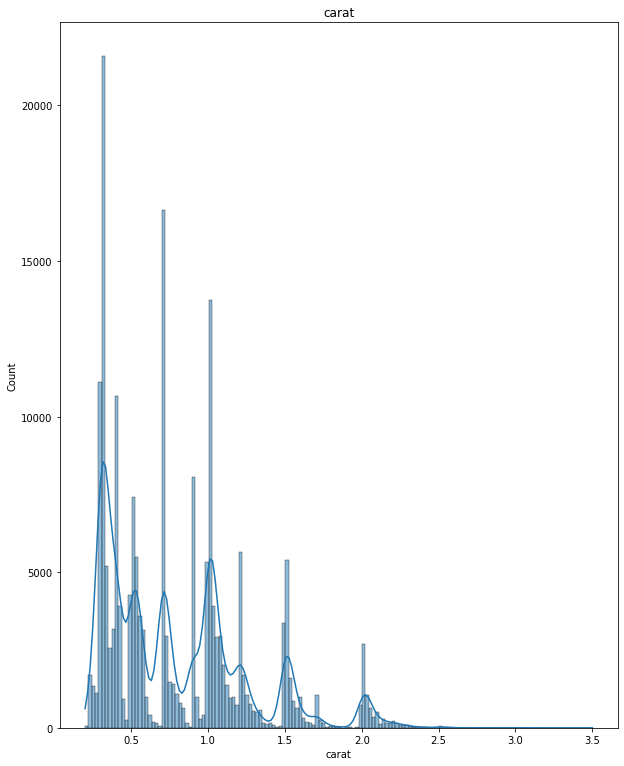

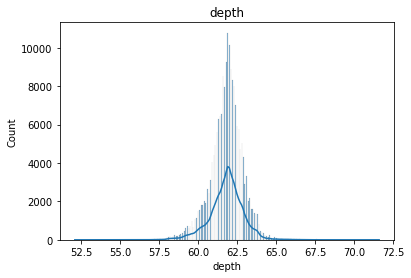

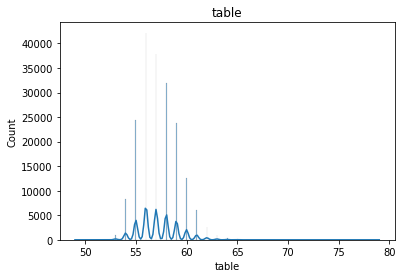

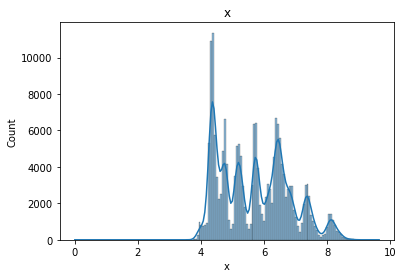

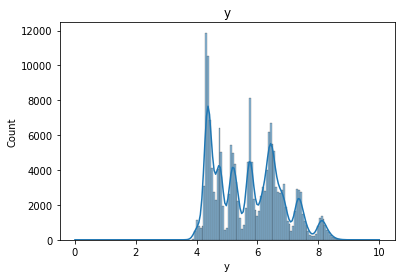

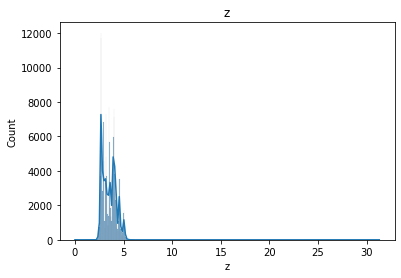

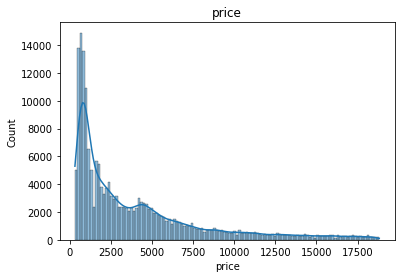

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

### Univariate analysis for categorical variables

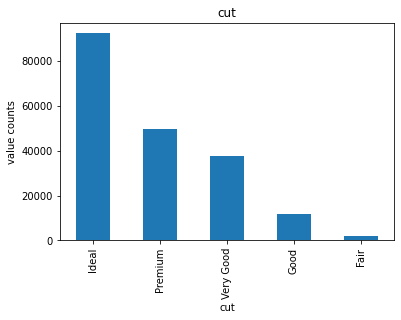

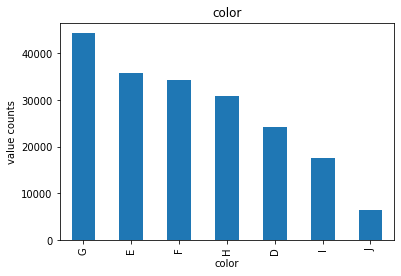

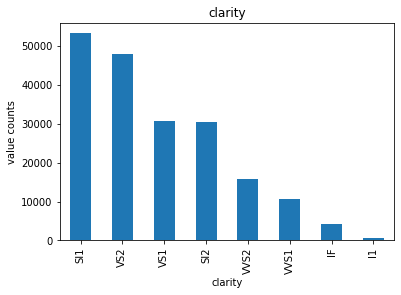

In [11]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

# Bivariate Analysis with Visualisation

### Correlation heatmap

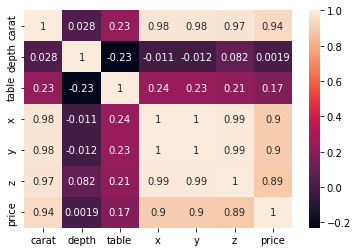

In [12]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

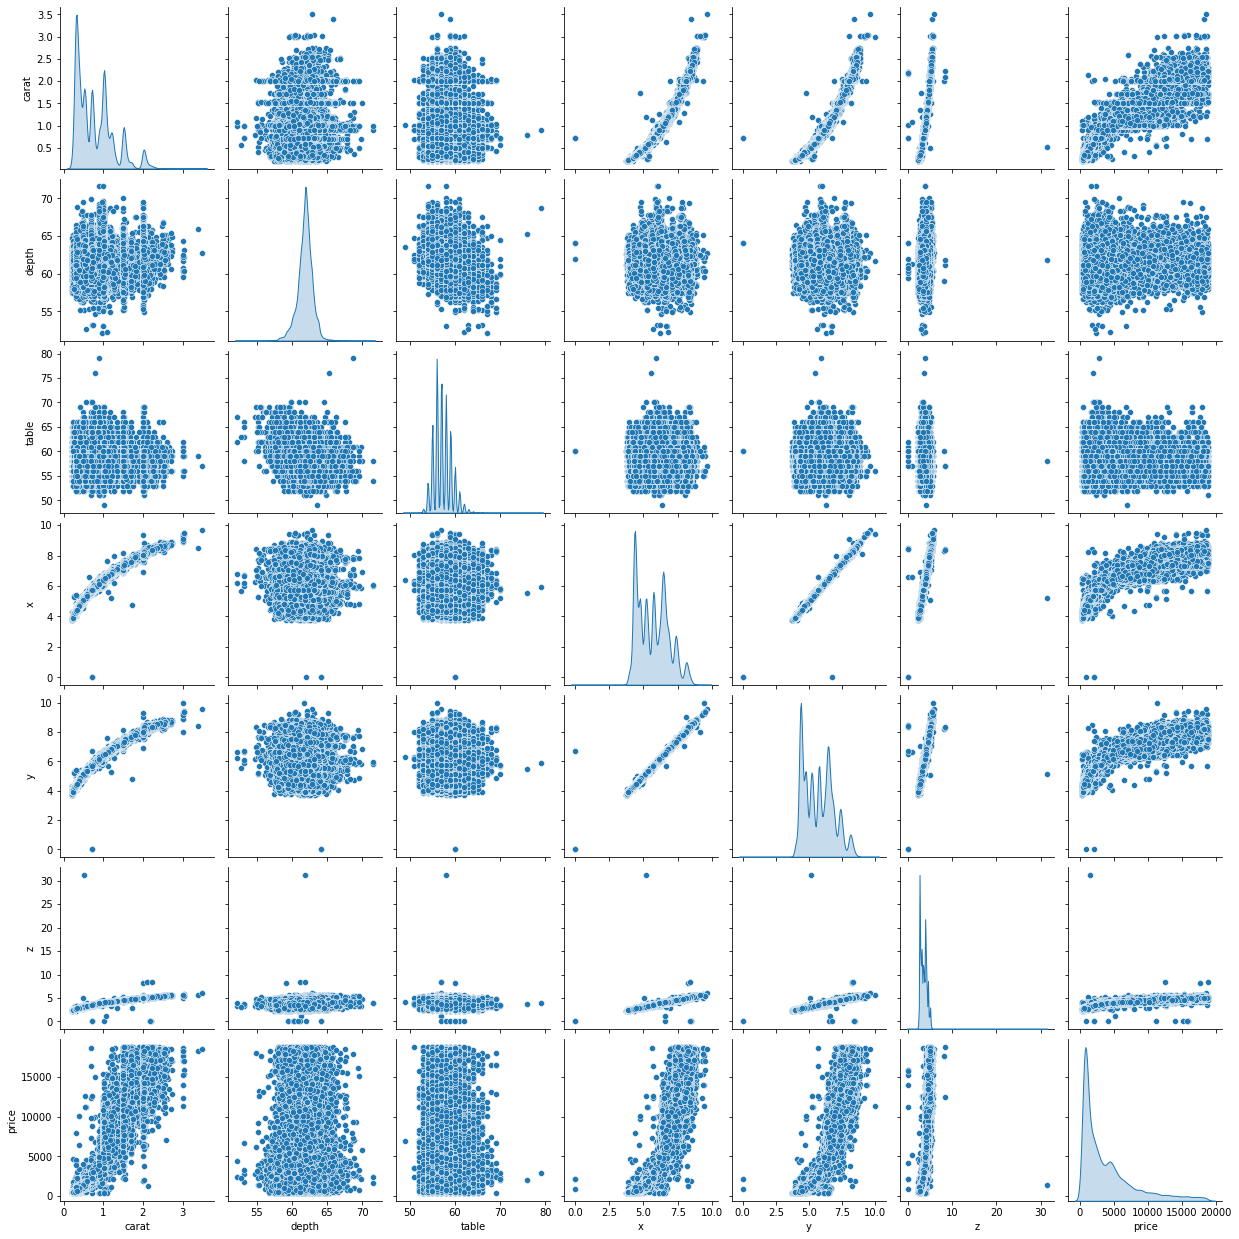

In [14]:
sb.pairplot(df,diag_kind='kde')
plt.show()

# Categorical Features vs Target Feature Price Boxplot

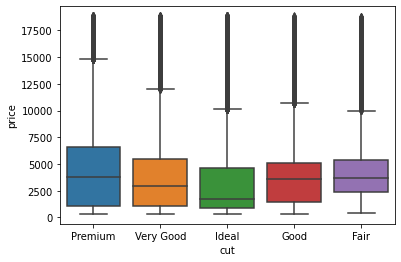

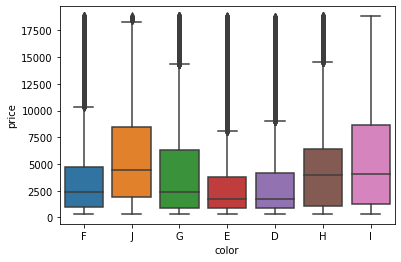

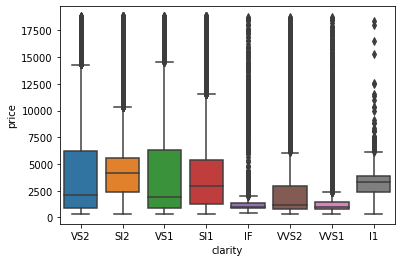

In [15]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()

# Ordinal Mapping of categorical features

## It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

### Check this link for details : https://www.americangemsociety.org/ags-diamond-grading-system/

# Creating Mapper for each categorical variable


In [16]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

## Applying the mapper to the dataframe


In [17]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

In [18]:
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


## Mutual Information Scores

## Seperating X and Y

In [19]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

## Calculating Mutual Information scores for regression


In [20]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [21]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

## Visualizing Mutual Information Scores


carat      1.825115
x          1.674011
y          1.666632
z          1.615992
clarity    0.397911
color      0.285518
table      0.109664
cut        0.092104
depth      0.045643
Name: MI Scores, dtype: float64


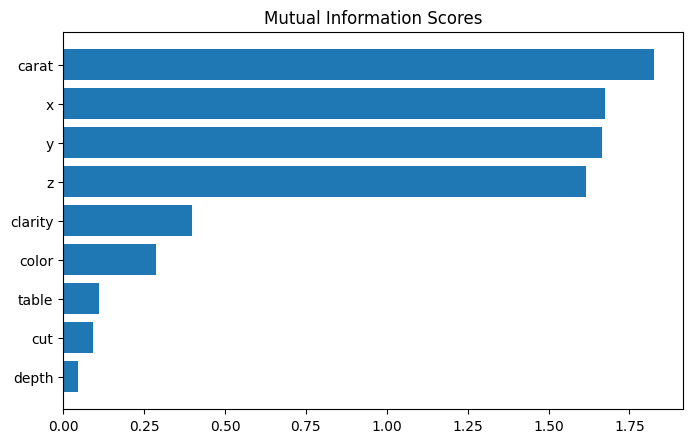

In [22]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Conclusion : Above shows that carat and x, y, z are most important features to predict the price of a gemstone